In [199]:
import matplotlib.pyplot as plt
import numpy as np
!python -m pip install -U prettytable

In [200]:
##x = [2.3006077040432, 2.2444914233319, 0.9347771784421, 0.4427678081307, 0.7999122862435, 3.336389981814, 5.6459569596094, 6.4757271569233, 5.9439134472436, 5.557994860134, 5.2393714280031, 5.0400654920648]
##y =[0.0445978242934, 0.1747875955436, 0.6794745259997, 1.5212035080068, 2.5078224437503, 3.4600120555616, 2.7741348494085, 1.4813300897804, 0.6394071420449, 0.2562255661913, 0.1722687535077, 0.0344629349447]
x = [2.3006077040432, 2.2444914233319, 0.9347771784421, 0.4427678081307, 0.7999122862435, 3.336389981814, 5.6459569596094, 6.4757271569233, 5.9439134472436, 5.557994860134, 5.0400654920648]
y = [0.0445978242934, 0.1747875955436, 0.6794745259997, 1.5212035080068, 2.5078224437503, 3.4600120555616, 2.7741348494085, 1.4813300897804, 0.6394071420449, 0.2562255661913, 0.0344629349447]

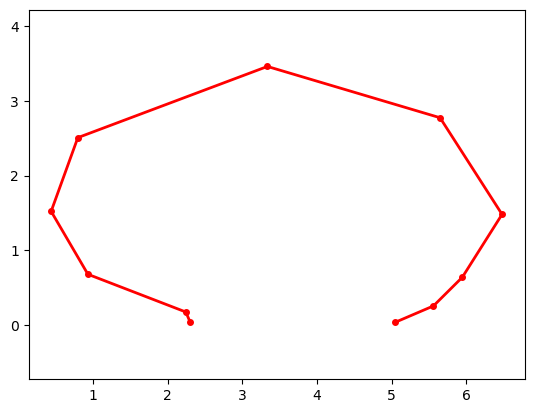

In [201]:
plt.axis("equal")
plt.plot(x, y, "ro-", linewidth=2, markersize=4)    

In [202]:
len(x)

11

In [1]:
#t = np.linspace(1,12,12)
t = np.linspace(1,11,11)
t

NameError: name 'np' is not defined

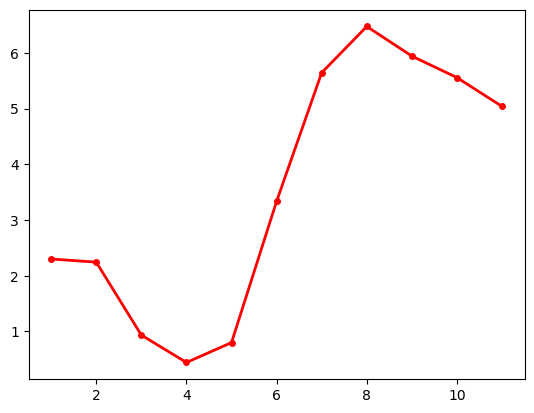

In [204]:
plt.plot(t, x, "ro-", linewidth=2, markersize=4)   

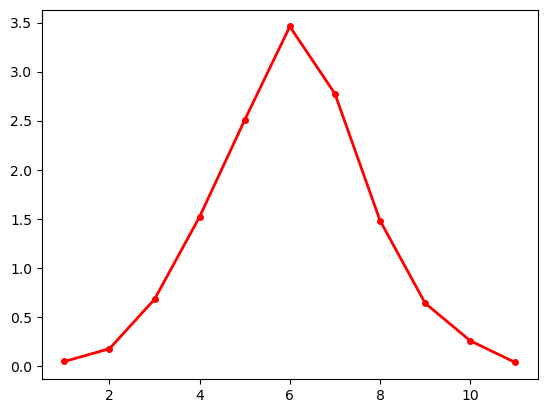

In [205]:
plt.plot(t, y, "ro-", linewidth=2, markersize=4)  

In [206]:
def lagrange(x, y, t):
    num = len(x)
    r = 0

    for i in range(num):
        w1 = 1.
        w2 = 1.
        for j in range(num):
            if i != j:
                w1 *= (t-x[j])
                w2 *= (x[i]-x[j])
        r += y[i]*w1/w2
    return r   

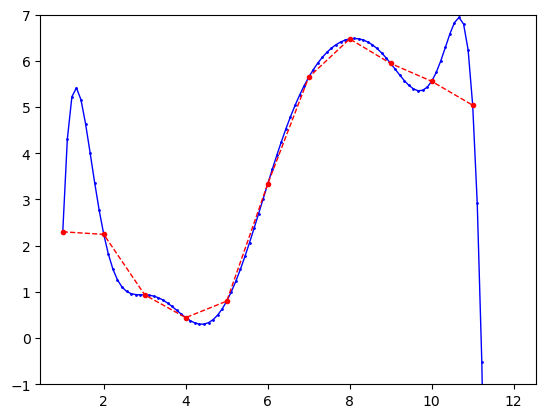

In [207]:
ts = np.linspace(1,12,100)
val_x = lagrange(t,x, ts)
plt.plot(ts, val_x, "bo-",linewidth=1, markersize=1)
plt.plot(t, x, "ro", linestyle='dashed', linewidth=1, markersize=3)
plt.ylim(-1,7)
plt.show()

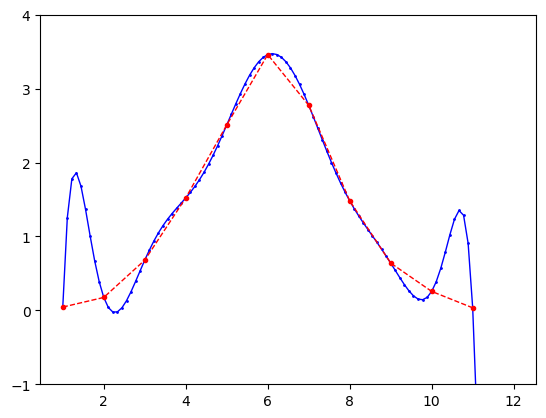

In [208]:
val_y = lagrange(t,y,ts)
plt.plot(ts, val_y, "bo-",linewidth=1, markersize=1)
plt.plot(t, y, "ro", linestyle='dashed', linewidth=1, markersize=3)
plt.ylim(-1,4)
plt.show()

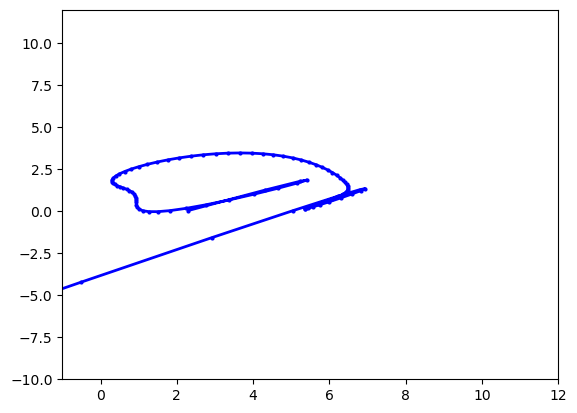

In [209]:
plt.plot(val_x, val_y, "bo-",linewidth=2, markersize=2)
plt.ylim(-10,12)
plt.xlim(-1,12)
plt.show()

In [210]:
xp = []
yp = []
tp = []
for i in range(0,len(x)-2,2):
    print(i)
    ts = np.linspace(i+1,i+3,99)
    #print(f"ts={ts}")
    t_seg = [i+1, i+2, i+3]
    x_seg = [x[i], x[i+1], x[i+2]]
    y_seg = [y[i], y[i+1], y[i+2]]
    val_x = lagrange(t_seg,x_seg,ts)
    val_y = lagrange(t_seg,y_seg,ts)
    tp.extend(ts)
    xp.extend(val_x)
    yp.extend(val_y)

0
2
4
6
8


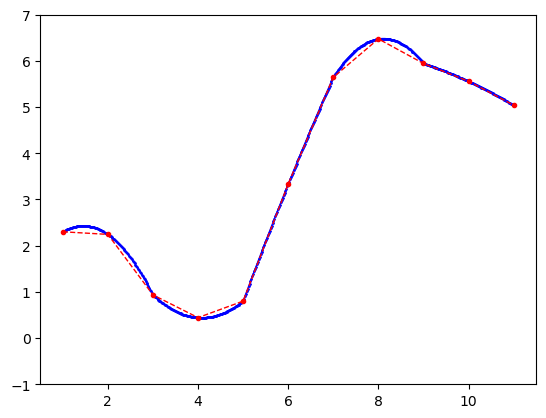

In [211]:
plt.plot(tp, xp, "bo-",linewidth=1, markersize=1)
plt.plot(t, x, "ro", linestyle='dashed', linewidth=1, markersize=3)
plt.ylim(-1,7)
plt.show()

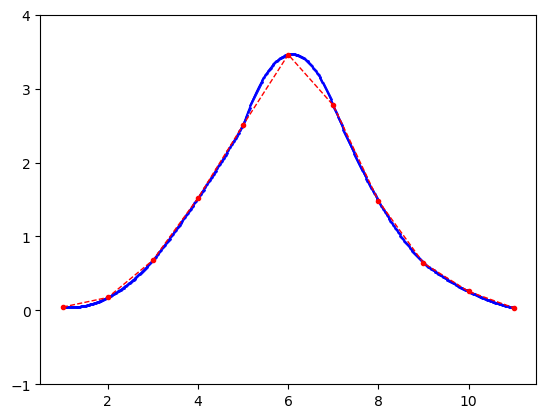

In [212]:
plt.plot(tp, yp, "bo-",linewidth=1, markersize=1)
plt.plot(t, y, "ro", linestyle='dashed', linewidth=1, markersize=3)
plt.ylim(-1,4)
plt.show()

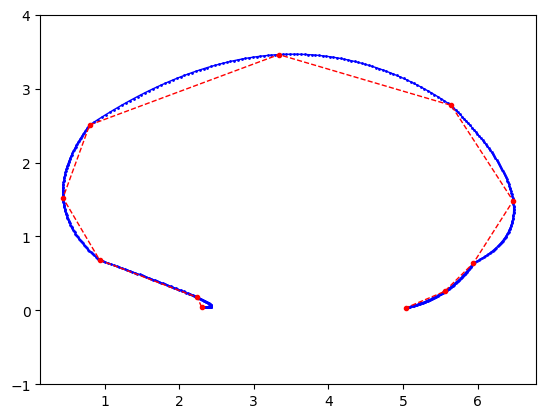

In [213]:
plt.plot(xp, yp, "bo-",linewidth=1, markersize=1)
plt.plot(x, y, "ro", linestyle='dashed', linewidth=1, markersize=3)
plt.ylim(-1,4)
plt.show()

### CUBIC PIECEWISE

In [214]:
xp = []
yp = []
tp = []
for i in range(0,len(x)-2,3):
    print(i)
    ts = np.linspace(i+1,i+4,150)
    #print(f"ts={ts}")
    t_seg = [i+1, i+2, i+3, i+4]
    x_seg = [x[i], x[i+1], x[i+2], x[i+3]]
    y_seg = [y[i], y[i+1], y[i+2], y[i+3]]
    val_x = lagrange(t_seg,x_seg,ts)
    val_y = lagrange(t_seg,y_seg,ts)
    tp.extend(ts)
    xp.extend(val_x)
    yp.extend(val_y)

0
3
6


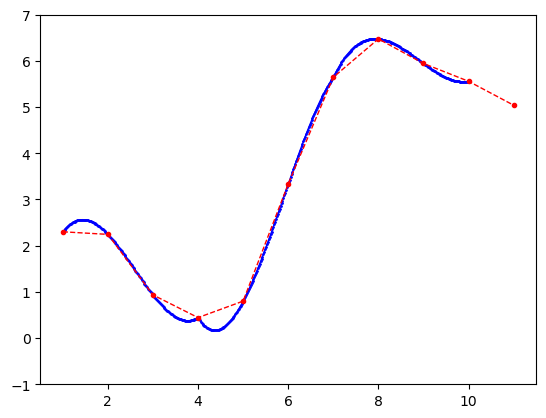

In [215]:
plt.plot(tp, xp, "bo-",linewidth=1, markersize=1)
plt.plot(t, x, "ro", linestyle='dashed', linewidth=1, markersize=3)
plt.ylim(-1,7)
plt.show()

### POLYNOMIAL COEFFICIENTS

In [216]:
def coeff(x, y):
   
    A = y[0]/((x[0]-x[1])*(x[0]-x[2]))
    B = y[1]/((x[1]-x[0])*(x[1]-x[2]))
    C = y[2]/((x[2]-x[0])*(x[2]-x[1]))  
    a = A + B + C
    b = -(A*(x[1]+x[2]) + B*(x[0]+x[2]) + C*(x[0]+x[1]))
    c = (A*x[1]*x[2]) + (B*x[0]*x[2]) + (C*(x[0]*x[1]))
    return a,b,c


In [217]:
tc = []
xc = []
yc = []
for i in range(0,len(x)-2,2):
    print(i)
    #print(f"ts={ts}")
    t_seg = [i+1, i+2, i+3]
    x_seg = [x[i], x[i+1], x[i+2]]
    y_seg = [y[i], y[i+1], y[i+2]]
    
    tc.append((t_seg[0], t_seg[-1]))
    a,b,c  = coeff(t_seg,x_seg)
    xc.append((a,b,c))
    #rint(f"x: {a} {b} {c}")
    a, b, c = coeff(t_seg,y_seg)
    #print(f"y: {a} {b} {c}")
    yc.append((a,b,c))
               
print(tc)
print(xc)
print(yc)

0
2
4
6
8
[(1, 3), (3, 5), (5, 7), (7, 9), (9, 11)]
[(-0.6267989820892502, 1.8242806655564507, 1.1031260205759994), (0.42457692421209997, -3.4640478397961, 7.505728379921499), (-0.11345535888754998, 3.7844866433335476, -15.286136958235502), (-0.6807919534968003, 11.041649499765903, -38.28678381740872), (-0.06600539047980059, 0.868183832006622, 3.4766955880479884)]
[(0.18724857960295002, -0.43155596755865, 0.2889052122491001), (0.07244497686820006, 0.33461414392970035, -0.9763726976031997), (-0.8190334089821998, 9.961557110615498, -26.824127884772196), (0.2254409059463, -4.6744183488225985, 24.448458899798005), (0.08070947230350001, -1.9166615496200998, 11.351893832042304)]


In [218]:
from prettytable import PrettyTable
pt = PrettyTable()

pt.field_names = ["t", "x(t)", "y(t)"]
for i in range(len(tc)):
    t_str = f"{tc[i][0]}-{tc[i][1]}"
    x_str = f"a={xc[i][0]:.3f} b={xc[i][1]:.3f} c={xc[i][2]:.3f}"
    y_str = f"a={yc[i][0]:.3f} b={yc[i][1]:.3f} c={yc[i][2]:.3f}"
    pt.add_row([t_str, x_str, y_str])
 
print(pt)

+------+-----------------------------+----------------------------+
|  t   |             x(t)            |            y(t)            |
+------+-----------------------------+----------------------------+
| 1-3  |   a=-0.627 b=1.824 c=1.103  |  a=0.187 b=-0.432 c=0.289  |
| 3-5  |   a=0.425 b=-3.464 c=7.506  |  a=0.072 b=0.335 c=-0.976  |
| 5-7  |  a=-0.113 b=3.784 c=-15.286 | a=-0.819 b=9.962 c=-26.824 |
| 7-9  | a=-0.681 b=11.042 c=-38.287 | a=0.225 b=-4.674 c=24.448  |
| 9-11 |   a=-0.066 b=0.868 c=3.477  | a=0.081 b=-1.917 c=11.352  |
+------+-----------------------------+----------------------------+


### VOL


In [219]:
# interv = tc[0]
# coeff_x = xc[0]
# coeff_y = yc[0]

def poly(t,coeff_x, coeff_y ):
    a,b,c = coeff_x
    A,B,C = coeff_y
    # start,end = interv
    return ((A*(t**2)+B*t+C)**2)*(2*a*t+b)


from scipy.integrate import quad,romberg
res = 0
for i in range(len(xc)):
    interv = tc[i]
    coeff_x = xc[i]
    coeff_y = yc[i]
    #r = quad(poly, interv[0], interv[1], args=(coeff_x, coeff_y))
    r = romberg(poly, interv[0], interv[1], args=(coeff_x, coeff_y))
    #res = res +r[0]
    res = res + r
    print(r)
res = res*np.pi
res

-0.27933399108161333
1.2597798135744354
49.4191622567807
3.968873230069839
-0.08432219527146868


170.5387154790677

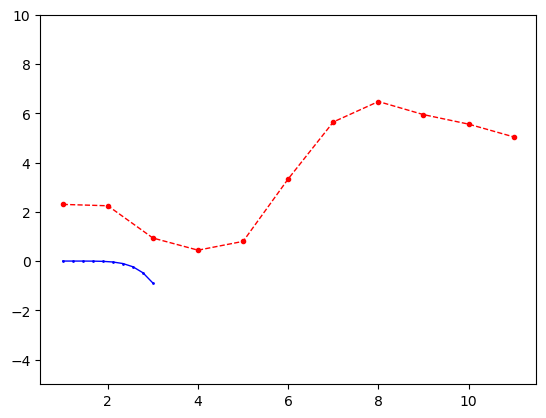

In [220]:
interv = tc[0]
coeff_x = xc[0]
coeff_y = yc[0]

tvals = np.linspace(interv[0], interv[1], 10)
xvals = poly(tvals, coeff_x, coeff_y)
plt.plot(tvals, xvals, "bo-",linewidth=1, markersize=1)
plt.plot(t, x, "ro", linestyle='dashed', linewidth=1, markersize=3)
plt.ylim(-5,10)
plt.show()

(1, 3)
(-0.6267989820892502, 1.8242806655564507, 1.1031260205759994)


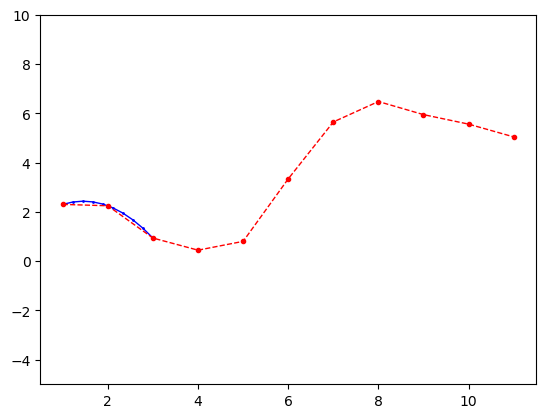

In [221]:
def coeff_poly(t, coeffs):
    a,b,c = coeffs
    return a*t*t +b*t + c

print(interv)
print(coeff_x)

tvals = np.linspace(interv[0], interv[1], 10)
xvals = coeff_poly(tvals, coeff_x)
plt.plot(tvals, xvals, "bo-",linewidth=1, markersize=1)
plt.plot(t, x, "ro", linestyle='dashed', linewidth=1, markersize=3)
plt.ylim(-5,10)
plt.show()

### Surface

In [222]:
# interv = tc[0]
# coeff_x = xc[0]
# coeff_y = yc[0]

def poly(t,coeff_x, coeff_y ):
    a,b,c = coeff_x
    A,B,C = coeff_y
    # start,end = interv
    return (A*(t**2)+B*t+C)*np.sqrt((2*a*t+b)**2+(2*A*t+B)**2)


from scipy.integrate import quad
res = 0
for i in range(len(xc)):
    interv = tc[i]
    coeff_x = xc[i]
    coeff_y = yc[i]
    r = quad(poly, interv[0], interv[1], args=(coeff_x, coeff_y))
    res = res +r[0]
    print(r)
res = res*2*np.pi
res

(0.6440044983720894, 9.65983405314531e-12)
(3.2504580830040086, 2.248600372923231e-11)
(16.463383640459323, 5.988900439294993e-13)
(4.454254398094453, 6.996946414128575e-09)
(0.3119592725878101, 3.463443671723022e-15)


157.85912397336705

In [223]:
4*np.pi*4**2

201.06192982974676

In [224]:
(4/3)*np.pi*4**3

268.082573106329